In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/items-orders/Orders data.xlsx
/kaggle/input/items-orders/Associated_Item_data.csv
/kaggle/input/forecast-datframe/forecast_complete_data.csv
/kaggle/input/forecasted-quantities/forecasted_quantities.csv


In [2]:
quantities = pd.read_csv(r'/kaggle/input/forecasted-quantities/forecasted_quantities.csv')

In [3]:
forecast_start_date = pd.to_datetime('2025-04-11')
forecast_end_date = pd.to_datetime('2025-04-24')
future_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='D')

In [4]:
result = pd.read_csv(r'/kaggle/input/forecast-datframe/forecast_complete_data.csv')

In [5]:
customer_items = result[['customer_id', 'order_item_id']].drop_duplicates()

customer_repeated = np.repeat(customer_items['customer_id'].values, len(future_dates))
item_repeated = np.repeat(customer_items['order_item_id'].values, len(future_dates))

# Tile future_dates for each customer-item
dates_tiled = np.tile(future_dates, len(customer_items))

# Create directly from numpy arrays
future_df = pd.DataFrame({
    'customer_id': customer_repeated,
    'order_item_id': item_repeated,
    'order_date': dates_tiled
})

In [6]:
future_df

,customer_id,order_item_id,order_date
0,5980,202967,2025-04-11
1,5980,202967,2025-04-12
2,5980,202967,2025-04-13
3,5980,202967,2025-04-14
4,5980,202967,2025-04-15
...,...,...,...
1611297,7056,262487,2025-04-20
1611298,7056,262487,2025-04-21
1611299,7056,262487,2025-04-22
1611300,7056,262487,2025-04-23


In [7]:
merged_df = pd.merge(future_df, quantities, left_index=True, right_index=True, how='left')

In [8]:
merged_df = merged_df.drop('Unnamed: 0', axis = 1, errors = 'ignore')

In [9]:
merged_df = merged_df.rename(columns={'0': 'quantity'})
merged_df

,customer_id,order_item_id,order_date,quantity
0,5980,202967,2025-04-11,0.0
1,5980,202967,2025-04-12,0.0
2,5980,202967,2025-04-13,0.0
3,5980,202967,2025-04-14,0.0
4,5980,202967,2025-04-15,0.0
...,...,...,...,...
1611297,7056,262487,2025-04-20,1.0
1611298,7056,262487,2025-04-21,1.0
1611299,7056,262487,2025-04-22,1.0
1611300,7056,262487,2025-04-23,1.0


In [10]:
orders = pd.read_excel(r'/kaggle/input/items-orders/Orders data.xlsx')
orders.head()

,order_date,order_id,order_number,customer_id,customer_name,poc_name,poc_id,amount,discount,net_order_amount,profit,order_status,warehouse_name,warehouse_id
0,2025-04-03,136349,SO/25-26/000818,5235,Anshu General Store Sector 34,Vikas Gupta,6,19125.00,1650.00,17475.0,0.0,CLOSED,Noida,3
1,2025-01-30,110393,SO/24-25/90881,7622,bhai di rasoi,Abhay Srimali,7814,9670.48,735.48,8935.0,-56.4,CLOSED,Greater NOIDA,6
2,2025-02-12,116427,SO/24-25/96511,3827,Shama chicken corner beta,Yash Pandey,51,62500.00,5000.00,57500.0,-650.0,CLOSED,Noida,3
3,2024-12-26,96182,SO/24-25/77411,2223,Bikaner Sweets ( Harola ),Swatantra,25,4520.00,420.00,4100.0,40.0,CLOSED,Noida,3
4,2024-12-30,97858,SO/24-25/78975,6903,Lucknow kirana store,Raj Kumar,7039,1700.00,0.00,1700.0,-88.0,CLOSED,Gomti Nagar,1


In [11]:
items = pd.read_csv(r'/kaggle/input/items-orders/Associated_Item_data.csv')

In [12]:
items_orders = pd.merge(items, orders, on = 'order_id')

In [13]:
items_orders = items_orders[['customer_id','order_item_id','item_name','warehouse_id']]
items_orders

,customer_id,order_item_id,item_name,warehouse_id
0,5980,202967,Anannya Rice,2
1,5540,148560,Ambey Patent Maida,3
2,1119,205222,Arhar Dal,2
3,3776,216104,Kezar Maida,1
4,5569,148902,Normal Sugar,2
...,...,...,...,...
115088,7869,262494,SAPNA GOLD AATA,4
115089,7806,262491,Hum Tum Rice,4
115090,7806,262489,Masodha Double Filter Sugar,4
115091,4982,262488,Matar,4


In [14]:
merged = pd.merge(merged_df, items_orders, how = 'left', on = ['customer_id','order_item_id'])
merged

,customer_id,order_item_id,order_date,quantity,item_name,warehouse_id
0,5980,202967,2025-04-11,0.0,Anannya Rice,2
1,5980,202967,2025-04-12,0.0,Anannya Rice,2
2,5980,202967,2025-04-13,0.0,Anannya Rice,2
3,5980,202967,2025-04-14,0.0,Anannya Rice,2
4,5980,202967,2025-04-15,0.0,Anannya Rice,2
...,...,...,...,...,...,...
1611297,7056,262487,2025-04-20,1.0,SAPNA GOLD AATA,4
1611298,7056,262487,2025-04-21,1.0,SAPNA GOLD AATA,4
1611299,7056,262487,2025-04-22,1.0,SAPNA GOLD AATA,4
1611300,7056,262487,2025-04-23,1.0,SAPNA GOLD AATA,4


In [15]:
warehouse_item_demand = merged.groupby(['warehouse_id', 'item_name', 'order_date'])['quantity'].sum().reset_index()
warehouse_item_demand

,warehouse_id,item_name,order_date,quantity
0,1,7 Star Rice,2025-04-11,1.0
1,1,7 Star Rice,2025-04-12,1.0
2,1,7 Star Rice,2025-04-13,1.0
3,1,7 Star Rice,2025-04-14,1.0
4,1,7 Star Rice,2025-04-15,1.0
...,...,...,...,...
13869,6,Vibhor Soya Pouch(1L),2025-04-20,1.0
13870,6,Vibhor Soya Pouch(1L),2025-04-21,1.0
13871,6,Vibhor Soya Pouch(1L),2025-04-22,1.0
13872,6,Vibhor Soya Pouch(1L),2025-04-23,1.0


In [16]:
total_demand_by_warehouse = merged.groupby(['warehouse_id', 'item_name'])['quantity'].sum().reset_index()
total_demand_by_warehouse

,warehouse_id,item_name,quantity
0,1,7 Star Rice,80.0
1,1,ASHOK BIRYANI MASALA (50 GM),2.0
2,1,ASHOK KALI MIRCH POWDER (100g),10.0
3,1,ASHOK SONTH MASALA (100gm),4.0
4,1,Adani Mota Besan,206.0
...,...,...,...
986,6,Tata Salt Pkt(1Kg),102.0
987,6,Tibaar Rice,26.0
988,6,Tuta Basmati Rice,6.0
989,6,Urad Sabut Dal,28.0


In [17]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [18]:
ref_date = pd.to_datetime('2025-04-11')  # Current date from your information
review_period_days = 7  # Weekly review
service_level = 0.95  # 95% service level
z_score = 1.645  # Z-score for 95% service level
estimated_lead_time_days = 3  

In [19]:
def calculate_inventory_targets(merged, ref_date, review_period_days, estimated_lead_time_days, z_score):
    """Calculate target inventory levels for each warehouse-item combination"""
    
    # Convert order_date to datetime if not already
    merged['order_date'] = pd.to_datetime(merged['order_date'])
    
    # Filter for future dates
    future_df = merged[merged['order_date'] >= ref_date]
    
    # Calculate review period + lead time window (days to cover with inventory)
    coverage_days = review_period_days + estimated_lead_time_days
    max_date = ref_date + pd.Timedelta(days=coverage_days)
    
    # Filter for dates within our coverage window
    window_df = future_df[future_df['order_date'] <= max_date]
    
    # Group by warehouse and item to calculate demand statistics
    inventory_targets = window_df.groupby(['warehouse_id', 'item_name']).agg(
        total_demand=('quantity', 'sum'),
        avg_daily_demand=('quantity', 'mean'),
        std_demand=('quantity', 'std')
    ).reset_index()
    
    # Handle zero/missing standard deviations
    inventory_targets['std_demand'] = inventory_targets['std_demand'].fillna(0.1)
    
    # Calculate safety stock
    inventory_targets['safety_stock'] = z_score * inventory_targets['std_demand'] * np.sqrt(coverage_days)
    
    # Calculate target inventory level (cycle stock + safety stock)
    inventory_targets['target_inventory'] = inventory_targets['total_demand'] + inventory_targets['safety_stock']
    
    # Round up to integers (can't have partial SKUs)
    inventory_targets['target_inventory'] = np.ceil(inventory_targets['target_inventory'])
    inventory_targets['safety_stock'] = np.ceil(inventory_targets['safety_stock'])
    
    return inventory_targets

In [20]:
def get_current_inventory(inventory_targets):
    """
    In a real system, you would query your actual inventory levels
    This function simulates inventory levels for demonstration
    """
    np.random.seed(42)  # For reproducibility
    
    # Create a copy to avoid modifying the original
    current_inventory = inventory_targets[['warehouse_id', 'item_name', 'target_inventory']].copy()
    
    # Simulate current inventory as percentage of target (between 20-80%)
    current_inventory['current_inventory'] = current_inventory['target_inventory'] * np.random.uniform(0.2, 0.8, len(current_inventory))
    current_inventory['current_inventory'] = np.floor(current_inventory['current_inventory'])
    
    return current_inventory

def generate_orders(inventory_targets, current_inventory):
    """Generate replenishment orders based on target and current inventory levels"""
    
    # Merge the dataframes
    orders = pd.merge(
        inventory_targets[['warehouse_id', 'item_name', 'target_inventory', 'safety_stock']], 
        current_inventory[['warehouse_id', 'item_name', 'current_inventory']],
        on=['warehouse_id', 'item_name']
    )
    
    # Calculate order quantity
    orders['order_quantity'] = orders['target_inventory'] - orders['current_inventory']
    
    # Only order if quantity is positive
    orders = orders[orders['order_quantity'] > 0]
    
    # Round to integers
    orders['order_quantity'] = np.ceil(orders['order_quantity']).astype(int)
    
    return pd.DataFrame(orders)

In [21]:
def run_periodic_review(merged, ref_date, review_period_days, estimated_lead_time_days, service_level=0.95):
    """Run a complete periodic review cycle"""
    
    print(f"Running periodic review on {ref_date.strftime('%Y-%m-%d')}")
    
    # Convert service level to z-score if not already done
    z_score = 1.645  # 95% service level
    if service_level != 0.95:
        # You can add more z-score mappings here
        z_scores = {0.9: 1.282, 0.95: 1.645, 0.99: 2.326}
        z_score = z_scores.get(service_level, 1.645)
    
    # Calculate inventory targets
    inventory_targets = calculate_inventory_targets(
        merged, ref_date, review_period_days, estimated_lead_time_days, z_score
    )
    
    # Get current inventory levels
    current_inventory = get_current_inventory(inventory_targets)
    
    # Generate orders
    orders = generate_orders(inventory_targets, current_inventory)
    
    # Print order summary
    print(f"\nOrders to place on {ref_date.strftime('%Y-%m-%d')}:")
    if len(orders) > 0:
        print(orders[['warehouse_id', 'item_name', 'current_inventory', 'target_inventory', 'order_quantity']])
    else:
        print("No orders needed at this time.")
    
    # Schedule next review
    next_review_date = ref_date + pd.Timedelta(days=review_period_days)
    print(f"\nNext review scheduled for: {next_review_date.strftime('%Y-%m-%d')}")
    
    return {
        'orders': orders,
        'inventory_targets': inventory_targets,
        'current_inventory': current_inventory,
        'next_review_date': next_review_date
    }

In [22]:
def visualize_inventory_plan(merged, item_name, warehouse_id, results, ref_date, lead_time_days):
    """Create visualization for inventory levels and demand"""
    
    # Extract data for this specific item and warehouse
    item_targets = results['inventory_targets']
    item_targets = item_targets[(item_targets['warehouse_id'] == warehouse_id) & 
                               (item_targets['item_name'] == item_name)]
    
    item_inventory = results['current_inventory']
    item_inventory = item_inventory[(item_inventory['warehouse_id'] == warehouse_id) & 
                                   (item_inventory['item_name'] == item_name)]
    
    item_orders = results['orders']
    item_orders = item_orders[(item_orders['warehouse_id'] == warehouse_id) & 
                             (item_orders['item_name'] == item_name)] if len(results['orders']) > 0 else pd.DataFrame()
    
    # Get relevant values
    target_level = item_targets['target_inventory'].values[0] if len(item_targets) > 0 else 0
    safety_stock = item_targets['safety_stock'].values[0] if len(item_targets) > 0 else 0
    current_level = item_inventory['current_inventory'].values[0] if len(item_inventory) > 0 else 0
    order_qty = item_orders['order_quantity'].values[0] if len(item_orders) > 0 else 0
    
    # Get demand data
    item_demand = merged[(merged['item_name'] == item_name) & 
                     (merged['warehouse_id'] == warehouse_id) &
                     (merged['order_date'] >= ref_date)]
    
    # Create date range for projection
    dates = pd.date_range(start=ref_date, periods=14)
    
    # Calculate projected inventory
    projected_inv = []
    inv_level = current_level
    
    for date in dates:
        # Add replenishment if it's delivery day
        if order_qty > 0 and date == ref_date + pd.Timedelta(days=lead_time_days):
            inv_level += order_qty
        
        # Subtract demand for this date
        day_demand = item_demand[item_demand['order_date'] == date]['quantity'].sum()
        if inv_level >= day_demand:
            inv_level -= day_demand
        else:
            inv_level = 0  # Can't go negative
        
        projected_inv.append(inv_level)
    
    # Create plot
    plt.figure(figsize=(12, 6))
    
    # Plot demand bars
    plt.bar(item_demand['order_date'], item_demand['quantity'], 
            color='skyblue', alpha=0.6, label='Forecasted Demand')
    
    # Plot inventory projection
    plt.plot(dates, projected_inv, 'b-', linewidth=2, label='Projected Inventory')
    
    # Add reference lines
    plt.axhline(y=target_level, color='green', linestyle='-', 
                label=f'Target Level: {target_level}')
    plt.axhline(y=safety_stock, color='red', linestyle='--', 
                label=f'Safety Stock: {safety_stock}')
    plt.axhline(y=current_level, color='orange', linestyle=':', 
                label=f'Current Level: {current_level}')
    
    # Mark delivery date if applicable
    if order_qty > 0:
        delivery_date = ref_date + pd.Timedelta(days=lead_time_days)
        plt.axvline(x=delivery_date, color='purple', linestyle='--', 
                    label=f'Delivery: +{order_qty} units')
    
    plt.title(f'Inventory Plan for {item_name} at Warehouse {warehouse_id}')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    return plt

Running periodic review on 2025-04-11

Orders to place on 2025-04-11:
     warehouse_id                       item_name  current_inventory  \
0               1                     7 Star Rice               19.0   
1               1    ASHOK BIRYANI MASALA (50 GM)                2.0   
2               1  ASHOK KALI MIRCH POWDER (100g)                4.0   
3               1      ASHOK SONTH MASALA (100gm)                2.0   
4               1                Adani Mota Besan               30.0   
..            ...                             ...                ...   
986             6              Tata Salt Pkt(1Kg)               32.0   
987             6                     Tibaar Rice                6.0   
988             6               Tuta Basmati Rice                1.0   
989             6                  Urad Sabut Dal               14.0   
990             6           Vibhor Soya Pouch(1L)              117.0   

     target_inventory  order_quantity  
0                46.0    

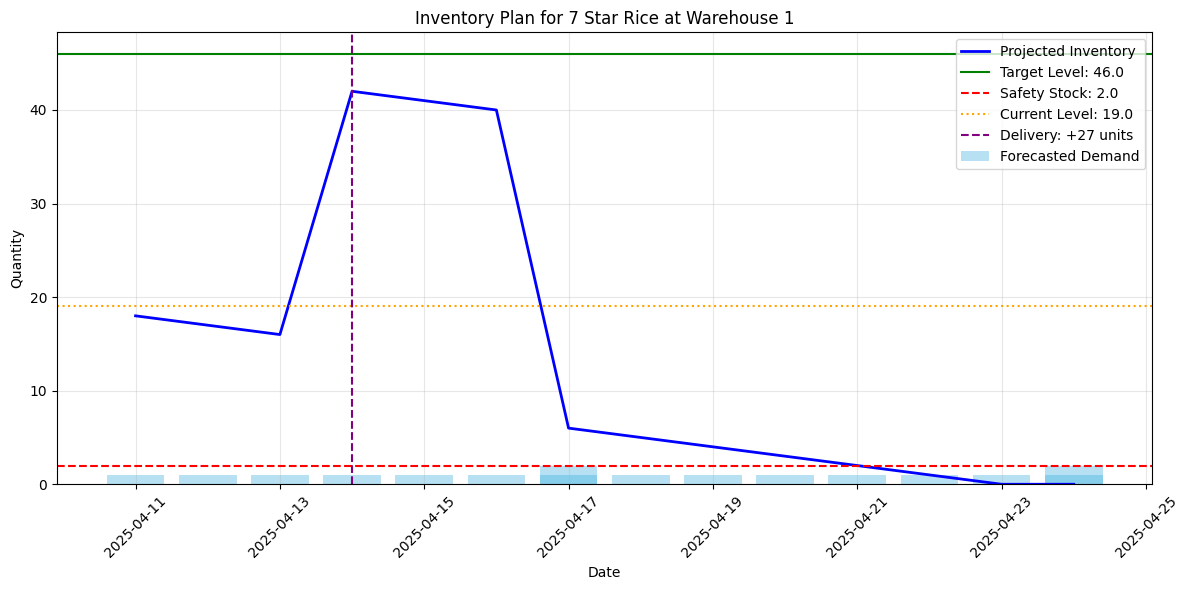

In [23]:
# Main execution function
def run_inventory_system(df):
    # Set parameters
    ref_date = pd.to_datetime('2025-04-11')
    review_period_days = 7  # Weekly review
    estimated_lead_time_days = 3  # Estimated lead time
    service_level = 0.95  # 95% service level
    
    # Run the periodic review
    results = run_periodic_review(
        merged, 
        ref_date, 
        review_period_days, 
        estimated_lead_time_days, 
        service_level
    )
    
    # Visualize for a specific item if orders exist
    if len(results['orders']) > 0:
        # Select first order for visualization
        example_order = results['orders'].iloc[0]
        
        visualize_inventory_plan(
            merged,
            example_order['item_name'],
            example_order['warehouse_id'],
            results,
            ref_date,
            estimated_lead_time_days
        )
        plt.show()
    
    return results

# Run the system
results = run_inventory_system(merged)